## End of Distribution imputation
If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

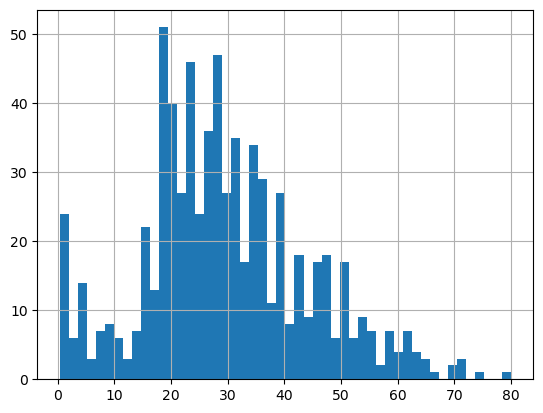

In [48]:
df.Age.hist(bins=50)

In [49]:
extreme = df.Age.mean() + 3*df.Age.std()        # mu + 3 st. dev. 

##### This technique says that pick a value from after 73.27 and replacae it with the nan values.

In [50]:
median = df.Age.median()
median

28.0

C:\Users\Rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

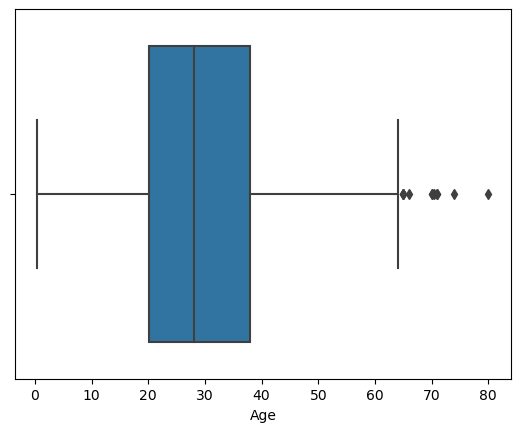

In [51]:
#To check the outliers.
import seaborn as sns
sns.boxplot('Age',data=df)

In [52]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [53]:
impute_nan(df,'Age',median,extreme)

In [56]:
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


<AxesSubplot:>

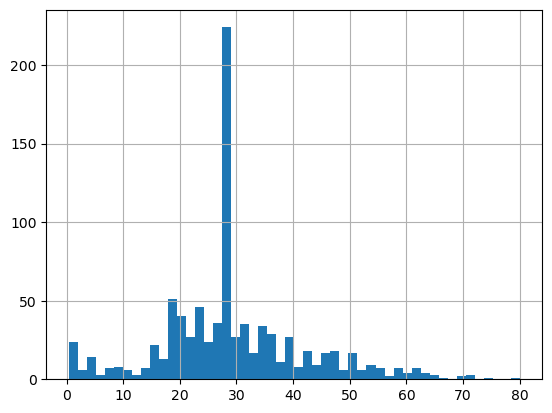

In [54]:
df.Age.hist(bins=50)

<AxesSubplot:>

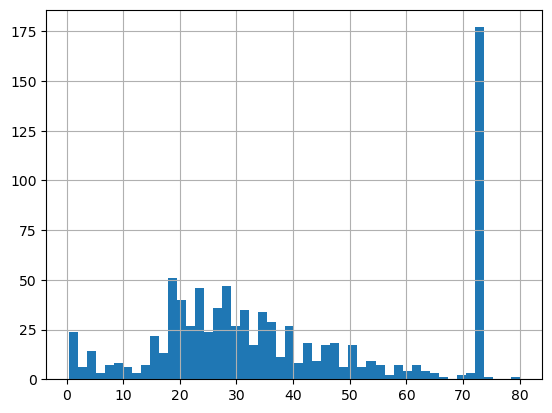

In [55]:
df.Age_end_distribution.hist(bins=50)

C:\Users\Rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

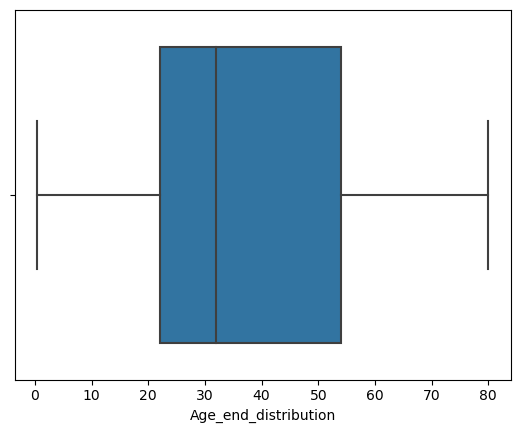

In [59]:
sns.boxplot('Age_end_distribution',data=df)

#### Outliers has been captupured by using end of distribution

In [60]:
df.Age.plot(kind='kde', color='red')
df.Age_end_distribution.plot(kind='kde', ax=ax, color='green')

NameError: name 'ax' is not defined

#### Advantages:
· Easy to implement

· Fast way of obtaining complete datasets

· Captures the importance of “missingness” if there is one

#### Disadvantages:
· Distortion of the original variable distribution

· Distortion of the original variance

· Distortion of the covariance with the remaining variables of the dataset

· This technique may mask true outliers in the distribution